### features:
* spectogram coef
* zero crossing rate
* selected chromogram values
* selected tempogram values
* wavelet levels

In [1]:
import pandas as pd 
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, recall_score
import matplotlib.pyplot as plt
import itertools

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [2]:
path = "/Users/ecem/Desktop/phonocardiogram/data/MV"

## Load data

Here, our target is to predict disease of patients with multiple diseases. So; our y will be disease column of two column indicatin geach patients disease.

In [3]:
present_df = pd.read_csv(path + "/present/present_MV_p_features.csv", index_col = 0) 
present_df

,freq_0,freq_1,freq_2,freq_3,freq_4,freq_5,freq_6,freq_7,freq_8,freq_9,...,tempogram_177,tempogram_179,tempogram_180,tempogram_181,tempogram_182,tempogram_183,tempogram_184,tempogram_189,tempogram_190,tempogram_191
0,3.565702e-11,5.058110e-11,5.009728e-11,4.895926e-11,4.722786e-11,4.500613e-11,4.242970e-11,3.966712e-11,3.708980e-11,3.708926e-11,...,5.935937e-18,1.662298e-17,3.058823e-17,4.257155e-17,1.599420e-18,2.954374e-17,2.787757e-17,2.079163e-17,1.414332e-17,2.889118e-17
1,5.134365e-11,7.243118e-11,7.189839e-11,7.103701e-11,6.990488e-11,6.861625e-11,6.737140e-11,6.641766e-11,6.575817e-11,6.519725e-11,...,-5.254064e-18,1.822149e-18,5.966399e-18,6.824811e-18,-1.274840e-17,1.245525e-18,4.397453e-18,3.463668e-18,2.908491e-18,1.156050e-17
2,2.742123e-11,3.922052e-11,3.971625e-11,4.018998e-11,4.085918e-11,4.177337e-11,4.266612e-11,4.347156e-11,4.415444e-11,4.468334e-11,...,-1.399242e-18,1.518069e-17,2.112637e-17,3.021586e-17,3.636606e-18,1.548249e-17,1.490537e-17,1.172312e-17,1.392197e-17,3.309639e-17
3,7.253805e-11,1.041101e-10,1.063940e-10,1.085748e-10,1.104742e-10,1.120098e-10,1.131441e-10,1.138754e-10,1.142270e-10,1.142320e-10,...,3.116256e-18,6.818597e-18,1.140233e-17,1.925106e-17,6.424538e-18,6.027065e-18,3.647587e-18,1.401124e-17,5.493047e-18,1.249725e-17
4,2.953180e-11,4.238516e-11,4.372856e-11,4.530598e-11,4.697467e-11,4.870685e-11,5.050376e-11,5.234866e-11,5.417679e-11,5.591282e-11,...,-7.287605e-19,8.725804e-18,1.947595e-17,2.591243e-17,3.190898e-18,1.619882e-17,1.861592e-17,1.739028e-17,1.523477e-17,2.122196e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,1.166323e-10,1.695751e-10,1.785708e-10,1.880550e-10,1.965457e-10,2.034097e-10,2.084664e-10,2.118851e-10,2.141929e-10,2.162313e-10,...,-2.756389e-18,7.919038e-18,1.114470e-17,2.350613e-17,-1.727700e-19,3.071198e-18,1.276759e-19,8.789764e-18,5.328876e-18,1.366309e-17
1076,1.330582e-10,1.908228e-10,1.972918e-10,2.059115e-10,2.154406e-10,2.249094e-10,2.336467e-10,2.413569e-10,2.483390e-10,2.560687e-10,...,-2.642670e-18,3.961560e-18,1.011196e-17,2.483538e-17,-3.921357e-18,1.807005e-18,-2.634816e-18,2.755519e-18,5.315982e-18,1.457212e-17
1077,1.971183e-10,2.801003e-10,2.822917e-10,2.837147e-10,2.838144e-10,2.823869e-10,2.794099e-10,2.750574e-10,2.697999e-10,2.648555e-10,...,9.801412e-19,1.039517e-17,2.379334e-17,2.607605e-17,2.261629e-18,1.203609e-17,-2.183155e-19,1.435194e-17,1.608025e-17,2.572093e-17
1078,2.030124e-10,2.879313e-10,2.892743e-10,2.899291e-10,2.892023e-10,2.868329e-10,2.829544e-10,2.780129e-10,2.726470e-10,2.675961e-10,...,-8.669065e-19,1.459451e-17,2.212606e-17,2.606953e-17,4.050412e-18,8.375194e-18,-3.074482e-18,1.030202e-17,6.865534e-18,1.954120e-17


In [4]:
1080*60/40


1620.0

In [6]:
absent_df = pd.read_csv(path + "/absent/absent_MV_p_features.csv", index_col = 0) 
#absent_df

In [7]:
absent_df =  absent_df.sample(n = 1620 , axis = 0)

### create labels

In [8]:
y = np.concatenate((np.ones(1080), np.zeros(1620)), axis =0)
y.shape

(2700,)

## concat features

In [9]:
df = pd.concat([present_df, absent_df], axis = 0)
#df

## With threshold

In [10]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold =  0.0001)   # düşük  threshold
_ = vt.fit(df)
masked = vt.get_support()
features_masked = df.loc[:, masked]
#features_masked # uncomment to see the dataframe #6941, 703

In [11]:
X_train_, X_valid_, y_train_, y_valid_ = train_test_split(features_masked, y , train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [12]:
import xgboost as xgb

clf = xgb.XGBClassifier(objective= "binary:logistic", eval_metric = "logloss")


In [13]:
clf.fit(X_train_, y_train_)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [14]:
yhat = clf.predict(X_valid_)

In [15]:
yhat.shape

(540,)

In [16]:
y_valid_.shape

(540,)

In [17]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid_, yhat)
print("accuracy: %.2f%%" % (accuracy * 100.0))

accuracy: 69.63%


In [18]:
from sklearn.metrics import recall_score
recall = recall_score(y_valid_, yhat, average= 'weighted')
print("recall: %.2f%%" % (recall * 100.0))


recall: 69.63%


In [19]:
from sklearn.metrics import precision_score
precision = precision_score(y_valid_, yhat, average= 'weighted')
print("precision: %.2f%%" % (precision * 100.0))

precision: 70.08%


/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


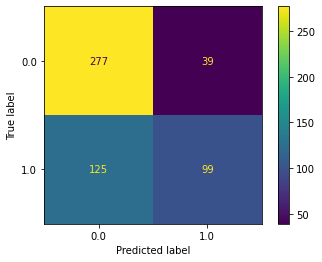

In [20]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_valid_, y_valid_) 

In [21]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_valid_, yhat)
print(f"ROC AUC: {score:.4f}")

ROC AUC: 0.6593


In [22]:
names =["absent", "present"]
print(classification_report(y_valid_, yhat, target_names = names))

              precision    recall  f1-score   support

      absent       0.69      0.88      0.77       316
     present       0.72      0.44      0.55       224

    accuracy                           0.70       540
   macro avg       0.70      0.66      0.66       540
weighted avg       0.70      0.70      0.68       540



* , 1 - 20% as moderately imbalanced data
* Notably, the Precision-Recall curve can be used as an alternative metric to evaluate the classifier when the data is imbalanced.
* the PR curve is composed of the recall/true positive rate (x-axis) & the precision (y-axis), as shown in figure below. The area under the PR ROC curve (PR AUC) provides a different perspective on evaluating the result of binary classifier. Lager PR AUC value indicates better model performance — the PR curve would move towards the upper right corner.
* When data is imbalanced, the AUC might not reflect the true performance of the classifier. The definition of the False Positive Rate (FPR), is the number of false positives divided by the number of negative samples. FPR is considered better when it’s smaller since it indicates fewer false positives. In imbalanced data, the FPR tends to stay at small values due to the large numbers of negatives (i.e. making the denominator large). Thus, FPR becomes less informative for the model performance in this situation.
* When there are more negative samples, it is common to predict more outcome as negative samples, causing the precision to decrease.

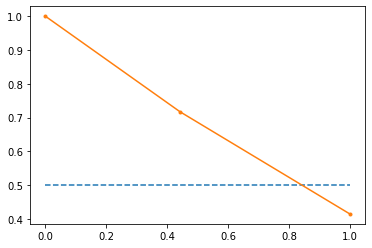

AUC: 0.695


In [23]:
precision, recall, thresholds = precision_recall_curve(y_valid_, yhat)
auc_score = auc(recall, precision)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()
print('AUC: %.3f' % auc_score)